In [12]:
# import neccessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
# avoid automatic inference 
df = pd.read_csv('18k_Projects.csv', dtype='unicode')
df.head()

,Id,Name,Url,State,Currency,Top Category,Category,Creator,Location,Updates,...,End Timestamp (UTC),Creator Bio,Creator Website,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
0,1007121454,Nail Art and Photos Printed on your Nails w/ E...,https://www.kickstarter.com/projects/137019948...,failed,USD,Art,Art,Dodie Egolf,Puyallup,0,...,2014/01/14 01:53:49.000,https://www.kickstarter.com/profile/1370199487,NaN,1,0,0,2,297,153,0
1,2032015036,Cold Again,https://www.kickstarter.com/projects/737783165...,failed,USD,Film & Video,Short Film,James Jacobs,Boston,0,...,2014/01/17 02:30:01.000,https://www.kickstarter.com/profile/737783165,NaN,1,4,0,0,276,98,0
2,733782855,Uchu Bijin Jewelry,https://www.kickstarter.com/projects/uchubijin...,failed,USD,Fashion,Fashion,Uchu Bijin,New York,1,...,2014/01/14 01:29:42.000,https://www.kickstarter.com/profile/858150887,http://uchubijin.com,2,2,0,12,1049,66,2
3,514687871,"Poetically Speaking: Stories of Love, Triumph ...",https://www.kickstarter.com/projects/tylicee/p...,failed,USD,Publishing,Poetry,Tylicee Mysreign,Detroit,0,...,2014/02/13 01:12:28.000,https://www.kickstarter.com/profile/1079088465,http://www.linkedin.com/pub/mys-reign/1a/469/4a8,1,2,0,0,309,169,0
4,683545993,Stranger Travels: Teachings from the Heart of ...,https://www.kickstarter.com/projects/197270300...,failed,USD,Publishing,Nonfiction,Ian Driscoll,Pucallpa,0,...,2014/01/14 01:17:46.000,https://www.kickstarter.com/profile/1972703001,http://strangertravels.wordpress.com,1,0,0,6,1636,216,0


In [14]:
# remove non-numeric data and strings or timestamps
colToRemove = ['Id', 'Name', 'Url', 'Location', 'Pledged', 'Creator', 'Category', 'Updates', 'Start', 'End', 'Latitude', 'Longitude', 'Creator Website', 'Creator Bio', 'Start Timestamp (UTC)', 'End Timestamp (UTC)']
df.drop(columns=colToRemove, inplace=True, errors='ignore')
df.head()

,State,Currency,Top Category,Comments,Rewards,Goal,Backers,Duration in Days,Facebook Connected,Facebook Friends,Facebook Shares,Has Video,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
0,failed,USD,Art,0,9,20000,2,30,Yes,272,70,Yes,1,0,0,2,297,153,0
1,failed,USD,Film & Video,0,8,3000,5,33,Yes,573,57,Yes,1,4,0,0,276,98,0
2,failed,USD,Fashion,2,17,5000,62,30,No,NaN,158,No,2,2,0,12,1049,66,2
3,failed,USD,Publishing,0,4,5000,5,60,Yes,1285,2,Yes,1,2,0,0,309,169,0
4,failed,USD,Publishing,0,12,12000,16,30,Yes,969,411,Yes,1,0,0,6,1636,216,0


In [15]:
# Convert non-numeric values by one hot encoding
df = pd.get_dummies(df, columns=['State', 'Currency', 'Top Category', 'Facebook Connected', 'Has Video'], drop_first=True)
df.head()

,Comments,Rewards,Goal,Backers,Duration in Days,Facebook Friends,Facebook Shares,Creator - # Projects Created,Creator - # Projects Backed,# Videos,...,Top Category_Food,Top Category_Games,Top Category_Journalism,Top Category_Music,Top Category_Photography,Top Category_Publishing,Top Category_Technology,Top Category_Theater,Facebook Connected_Yes,Has Video_Yes
0,0,9,20000,2,30,272,70,1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,8,3000,5,33,573,57,1,4,0,...,False,False,False,False,False,False,False,False,True,True
2,2,17,5000,62,30,NaN,158,2,2,0,...,False,False,False,False,False,False,False,False,False,False
3,0,4,5000,5,60,1285,2,1,2,0,...,False,False,False,False,False,True,False,False,True,True
4,0,12,12000,16,30,969,411,1,0,0,...,False,False,False,False,False,True,False,False,True,True


In [17]:
df.isnull().sum()

Comments                             0
Rewards                              0
Goal                                 0
Backers                              0
Duration in Days                     0
Facebook Friends                  5852
Facebook Shares                      0
Creator - # Projects Created         0
Creator - # Projects Backed       4244
# Videos                           101
# Images                             0
# Words (Description)                0
# Words (Risks and Challenges)     101
# FAQs                               0
State_successful                     0
Currency_CAD                         0
Currency_EUR                         0
Currency_GBP                         0
Currency_NZD                         0
Currency_USD                         0
Top Category_Comics                  0
Top Category_Crafts                  0
Top Category_Dance                   0
Top Category_Design                  0
Top Category_Fashion                 0
Top Category_Film & Video

In [20]:
print(df['State_successful'].corr(df['Facebook Friends'].astype(float)))
print(df['State_successful'].corr(df['Creator - # Projects Backed'].astype(float)))
print(df['State_successful'].corr(df['# Videos'].astype(float)))
print(df['State_successful'].corr(df['# Words (Risks and Challenges)'].astype(float)))

0.1595402478497283
0.10624973985586757
0.05657919078430431
0.007544860569767822


In [24]:
df.describe()

,Comments,Rewards,Goal,Backers,Duration in Days,Facebook Friends,Facebook Shares,Creator - # Projects Created,Creator - # Projects Backed,# Videos,...,Top Category_Food,Top Category_Games,Top Category_Journalism,Top Category_Music,Top Category_Photography,Top Category_Publishing,Top Category_Technology,Top Category_Theater,Facebook Connected_Yes,Has Video_Yes
count,18142,18142,18142,18142,18142,12290,18142,18142,13898,18041,...,18142,18142,18142,18142,18142,18142,18142,18142,18142,18142
unique,462,66,1124,1150,60,2373,1955,26,125,18,...,2,2,2,2,2,2,2,2,2,2
top,0,8,5000,1,30,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,True
freq,9781,1807,1356,1202,7201,110,1386,14108,4706,16034,...,17033,16519,18069,15410,17604,16091,17155,17495,12290,15053


/var/folders/1s/hjk6vgwx413bb0gvk7wfl_z40000gn/T/ipykernel_11832/2461401896.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Facebook Friends'], kde=True, hist=0)


<Axes: xlabel='Facebook Friends', ylabel='Density'>

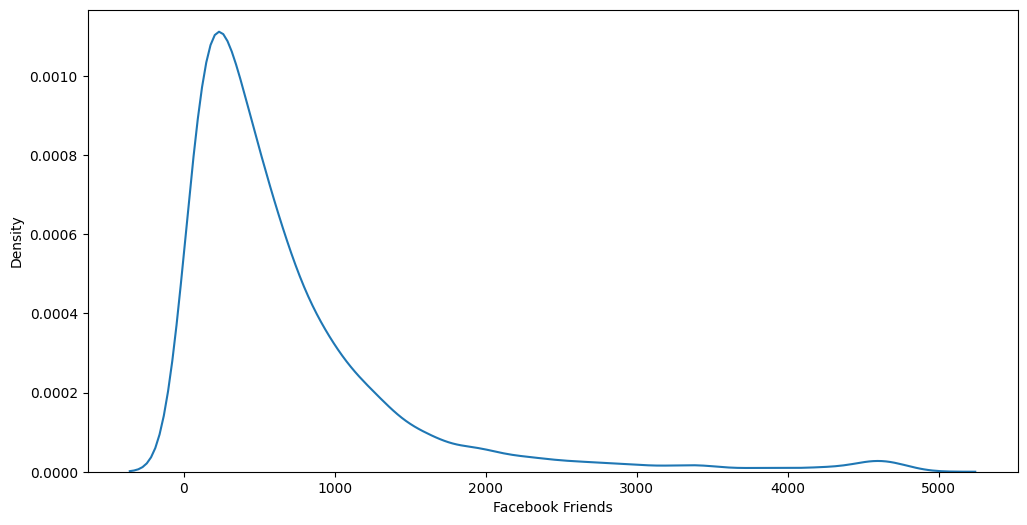

In [27]:
# Distribution plot of variable 'Facebook Friends'
plt.figure(figsize=(12, 6))
sns.distplot(df['Facebook Friends'], kde=True, hist=0)

/var/folders/1s/hjk6vgwx413bb0gvk7wfl_z40000gn/T/ipykernel_11832/2782054766.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Creator - # Projects Backed'], kde=True, hist=0)


<Axes: xlabel='Creator - # Projects Backed', ylabel='Density'>

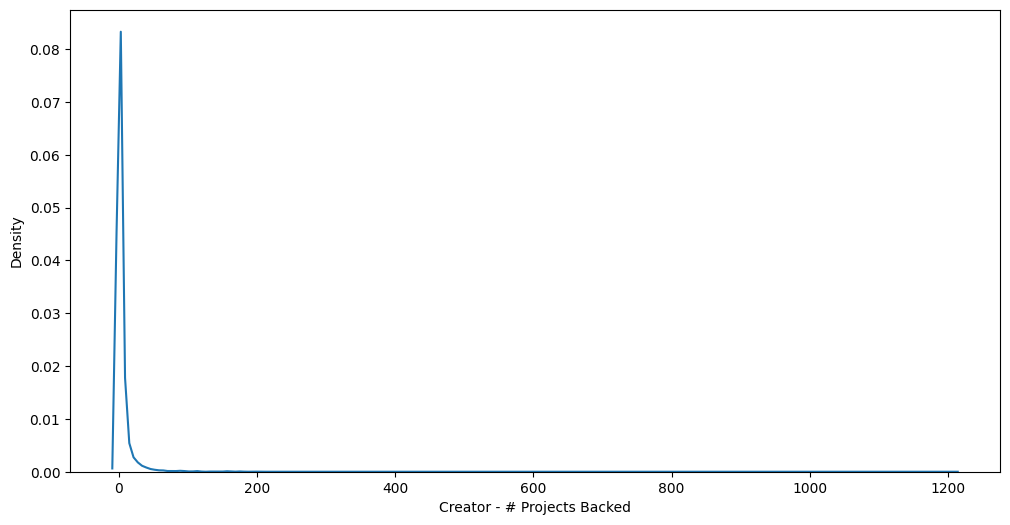

In [29]:
# Distribution plot of varaible 'Creator - # Project Backed'
plt.figure(figsize=(12, 6))
sns.distplot(df['Creator - # Projects Backed'], kde=True, hist=0)

In [31]:
# Fill missing values for 'Creator - # Projects Backed' with the mean value
df['Creator - # Projects Backed'].fillna(df['Creator - # Projects Backed'].astype(float).mean(), inplace=True)

# Drop remaining missing values for remaining variables
df.dropna(axis=0, how='any', inplace=True)
df.shape

(12215, 36)

In [33]:
# Set X and y variables
X = df.drop('State_successful', axis=1)
y = df['State_successful']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

In [35]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [37]:
model_predict = model.predict(X_test)
new_project = [
    0, #Comments
    9, #Rewards
    2500, #Goal
    157, #Backers
    31, #Duration in Days
    319, #Facebook Friends
    110, #Facebook Shares
    1, #Creator - # Projects Created
    0, #Creator - # Projects Backed
    0, ## Videos
    12, ## Images
    872, ## Words (Description)
    65, ## Words (Risks and Challenges)
    0, ## FAQs
    0, #Currency_AUD
    1, #Currency_CAD
    0, #Currency_EUR
    0, #Currency_GBP
    0, #Currency_NZD
    0, #Currency_USD
    0, #Top Category_Art
    0, #Top Category_Comics
    0, #Top Category_Crafts
    0, #Top Category_Dance
    0, #Top Category_Design
    0, #Top Category_Fashion
    1, #Top Category_Film & Video
    0, #Top Category_Food
    0, #Top Category_Games
    0, #Top Category_Journalism
    0, #Top Category_Music
    0, #Top Category_Photography
    0, #Top Category_Publishing
    0, #Top Category_Technology
    0, #Top Category_Theater
    #0, #Facebook Connected_No
    #0, #Facebook Connected_Yes
    #0, #Has Video_No
    #1, #Has Video_Yes
]

new_pred = model.predict([new_project])
print(new_pred)

[ True]


/Users/raymondli/miniconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
# Evaluate the model performance
# Confusion matrix
print(confusion_matrix(y_test, model_predict))

# Classification report
print(classification_report(y_test, model_predict))

[[1640  189]
 [ 221 1615]]
              precision    recall  f1-score   support

       False       0.88      0.90      0.89      1829
        True       0.90      0.88      0.89      1836

    accuracy                           0.89      3665
   macro avg       0.89      0.89      0.89      3665
weighted avg       0.89      0.89      0.89      3665

